<a href="https://colab.research.google.com/github/chaeeuen/python-machine-learing/blob/main/3_15_ESAA_%EA%B3%BC%EC%A0%9C%EC%88%98%EC%A0%95%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Matplotlib 기본 그래프 도구

## 1. 선 그래프

### 기본 사용법

1) 누락 데이터 처리
 : df = df.fillna(method='ffill')
2) 주석
 : annotate()
 > arrowstyle='->',
 > va= 'center', 'top', 'bottom', 'baeline'
 > ha= 'center', 'left', 'right'

 3) 화면분할하여 그래프 여러개 그리기 - axe 객체 활용
 : add_subplot(행의 크기, 열의 크기, 서브플롯 순서) > 그림 틀 만들기
 : legend() > 범례표시
 : set_ylim() > y축의 최대 최솟값
 : set_xticklabels() > 글자 회전

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
df  = pd.read_excel("/content/drive/MyDrive/시도별 전출입 인구수.xlsx", engine = 'openpyxl', header =0)

df=df.fillna(method='ffill')
mask = (df['전출지별'] == '서울특별시') & ( df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)
df.head()




Mounted at /content/drive


,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,324 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and dire

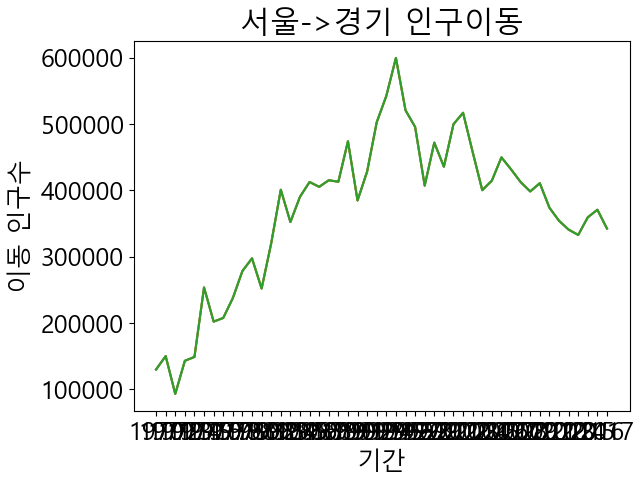

In [2]:

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum

fe = fm.FontEntry(
    fname='/content/drive/MyDrive/malgun.ttf', # ttf 파일이 저장되어 있는 경로
    name='malgunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'malgunGothic'})


df  = pd.read_excel("/content/drive/MyDrive/시도별 전출입 인구수.xlsx", engine = 'openpyxl', header =0)

df=df.fillna(method='ffill')
mask = (df['전출지별'] == '서울특별시') & ( df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

sr_one = df_seoul.loc['경기도']
plt.plot(sr_one.index, sr_one.values)

plt.plot(sr_one)

sr_one = df_seoul.loc['경기도']
plt.plot(sr_one.index, sr_one.values)

plt.title('서울->경기 인구이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()

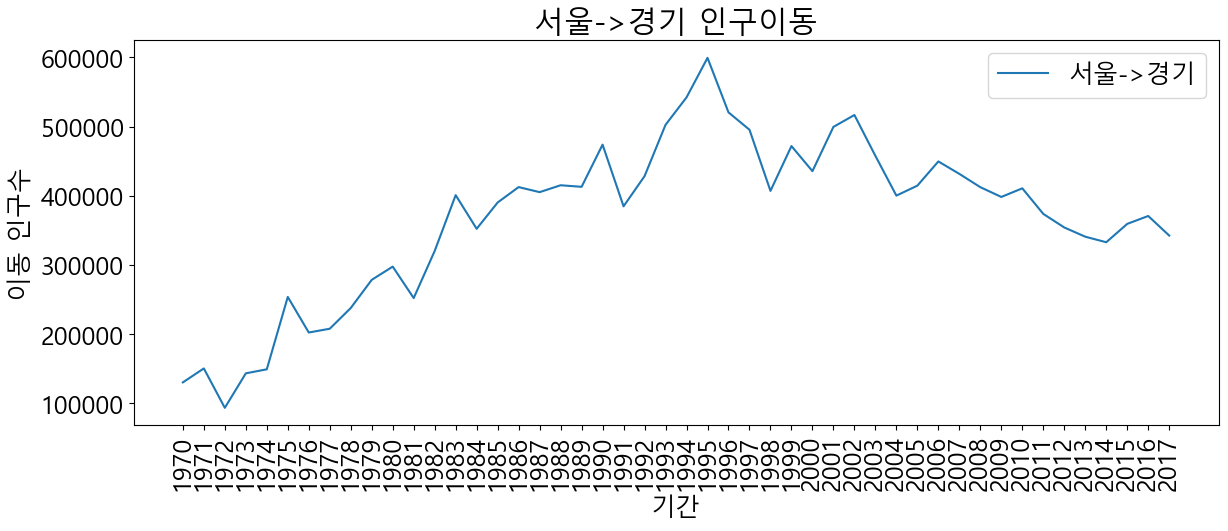

In [3]:
sr_one = df_seoul.loc['경기도']
plt.figure(figsize=(14,5))
plt.xticks(rotation='vertical')
plt.plot(sr_one.index, sr_one.values)

plt.title('서울->경기 인구이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.legend(labels=['서울->경기'],loc='best')
plt.show()

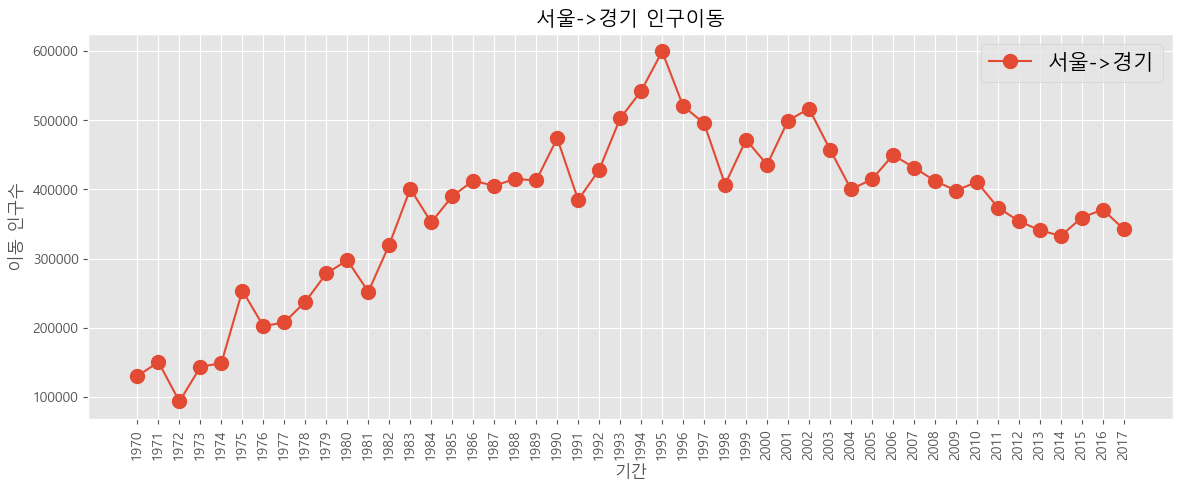

In [8]:
sr_one = df_seoul.loc['경기도']
plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.xticks(size=10, rotation='vertical')
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)

plt.title('서울->경기 인구이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.legend(labels=['서울->경기'],loc='best', fontsize=15)
plt.show()


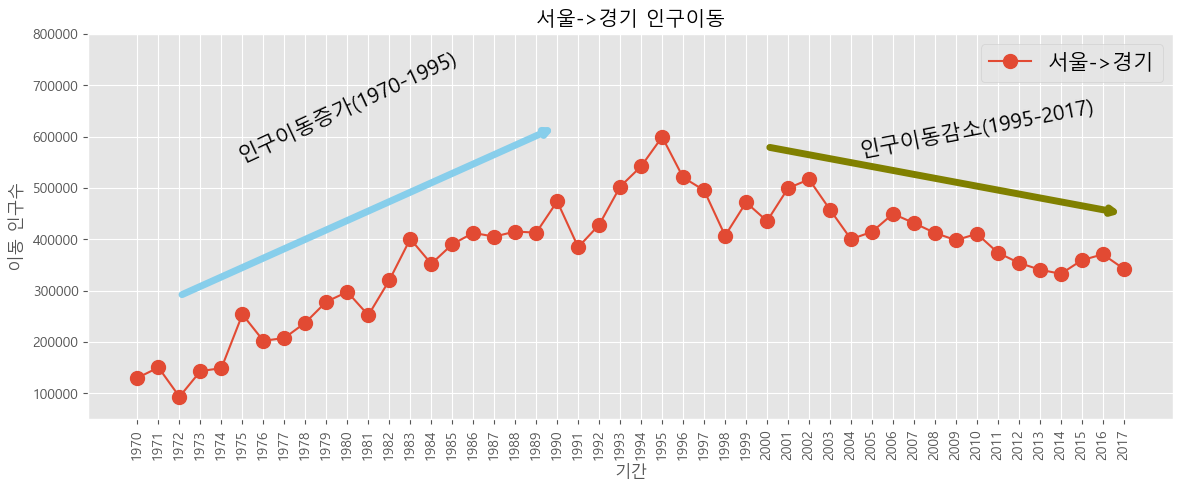

In [21]:
sr_one = df_seoul.loc['경기도']
plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.xticks(size=10, rotation='vertical')
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)

plt.title('서울->경기 인구이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.legend(labels=['서울->경기'],loc='best', fontsize=15)
plt.ylim(50000,800000)

plt.annotate('',
             xy=(20,620000),
             xytext=(2,290000),
             xycoords='data', arrowprops=dict(arrowstyle='->', color='skyblue', lw=5))

plt.annotate('',
             xy=(47,450000),
             xytext=(30,580000),
             xycoords='data', arrowprops=dict(arrowstyle='->', color='olive', lw=5)
             )

plt.annotate('인구이동증가(1970-1995)',
             xy=(10,550000),
             rotation=25,
             va='baseline',
             ha='center',
             fontsize=15,
             )


plt.annotate('인구이동감소(1995-2017)',
             xy=(40,560000),
             rotation=11,
             va='baseline',
             ha='center',
             fontsize=15,
             )

plt.show()

<ipython-input-31-2c6fe117ab0b>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation=75)
<ipython-input-31-2c6fe117ab0b>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation=75)


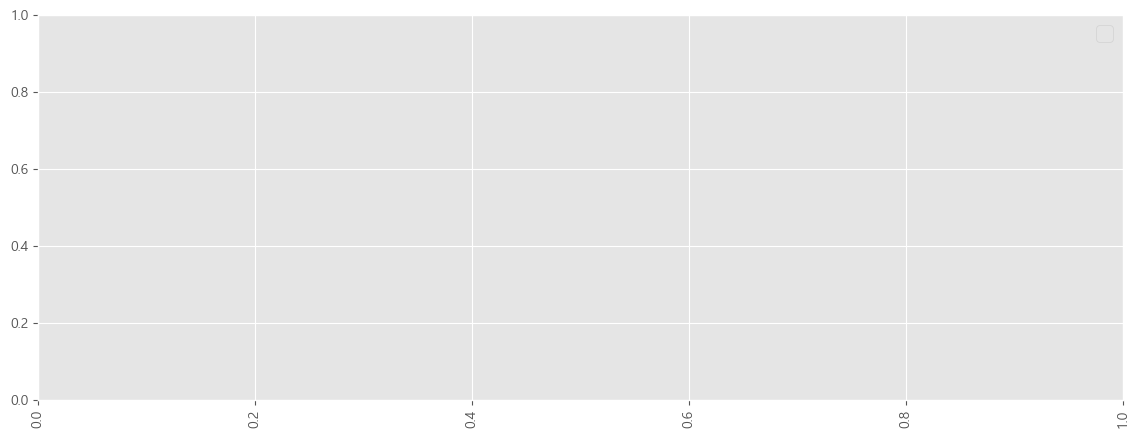

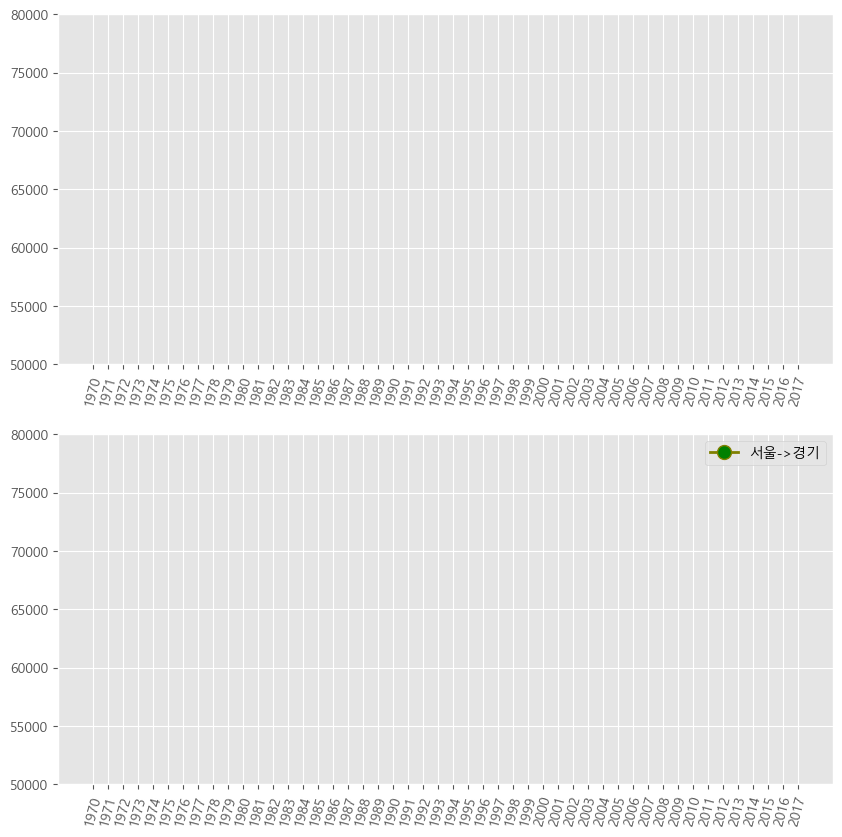

In [31]:
sr_one = df_seoul.loc['경기도']
plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.xticks(size=10, rotation='vertical')


plt.legend(labels=['서울->경기'],loc='best', fontsize=15)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)
ax1.plot(sr_one, 'o', markersize=10)
ax2.plot(sr_one, marker='o', markerfacecolor = 'green', markersize=10, color='olive', linewidth =2, label='서울->경기')
ax2.legend(loc='best')

ax1.set_ylim(50000,80000)
ax2.set_ylim(50000,80000)

ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()

AttributeError: 'Axes' object has no attribute 'set_xsticklabels'

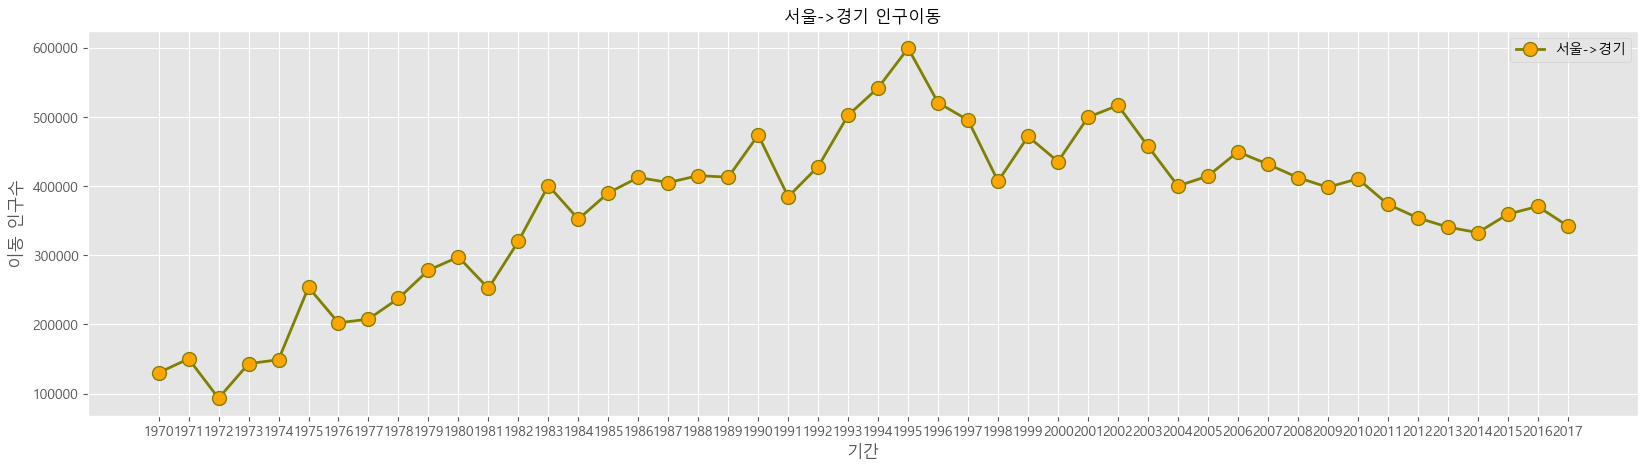

In [39]:
sr_one = df_seoul.loc['경기도']
plt.style.use('ggplot')


fig = plt.figure(figsize=(20,5))
ax= fig.add_subplot(1,1,1)

ax.plot(sr_one, marker='o', markerfacecolor='orange', markersize=10, color='olive', linewidth=2, label='서울->경기')
ax.legend(loc='best')

ax.set_title('서울->경기 인구이동', size=12)
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

ax.set_xsticklabels(sr_one.index, rotation=75)
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()

<ipython-input-41-a143ba007f6a>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation=90)


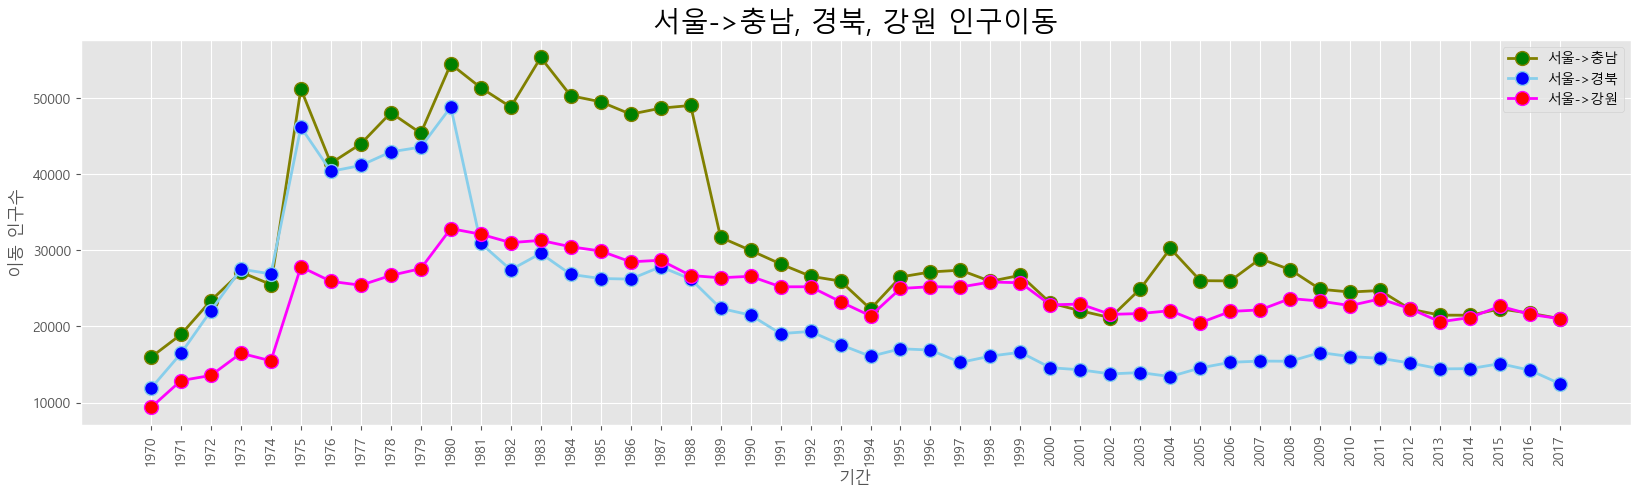

In [41]:
col_years = list(map(str,range(1970,2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도'], col_years]

plt.style.use('ggplot')

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

ax.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor='green', markersize=10, color='olive', linewidth=2, label='서울->충남')
ax.plot(col_years, df_3.loc['경상북도',:], marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linewidth=2, label='서울->경북')
ax.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor='red', markersize=10, color='magenta', linewidth=2, label='서울->강원')

ax.legend(loc='best')

ax.set_title('서울->충남, 경북, 강원 인구이동', size=20)

ax.set_xlabel('기간',size=12)
ax.set_ylabel('이동 인구수',size=12)

ax.set_xticklabels(col_years, rotation=90)

ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()


<ipython-input-43-1b3356b30477>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation=90)
<ipython-input-43-1b3356b30477>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation=90)
<ipython-input-43-1b3356b30477>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation=90)
<ipython-input-43-1b3356b30477>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation=90)


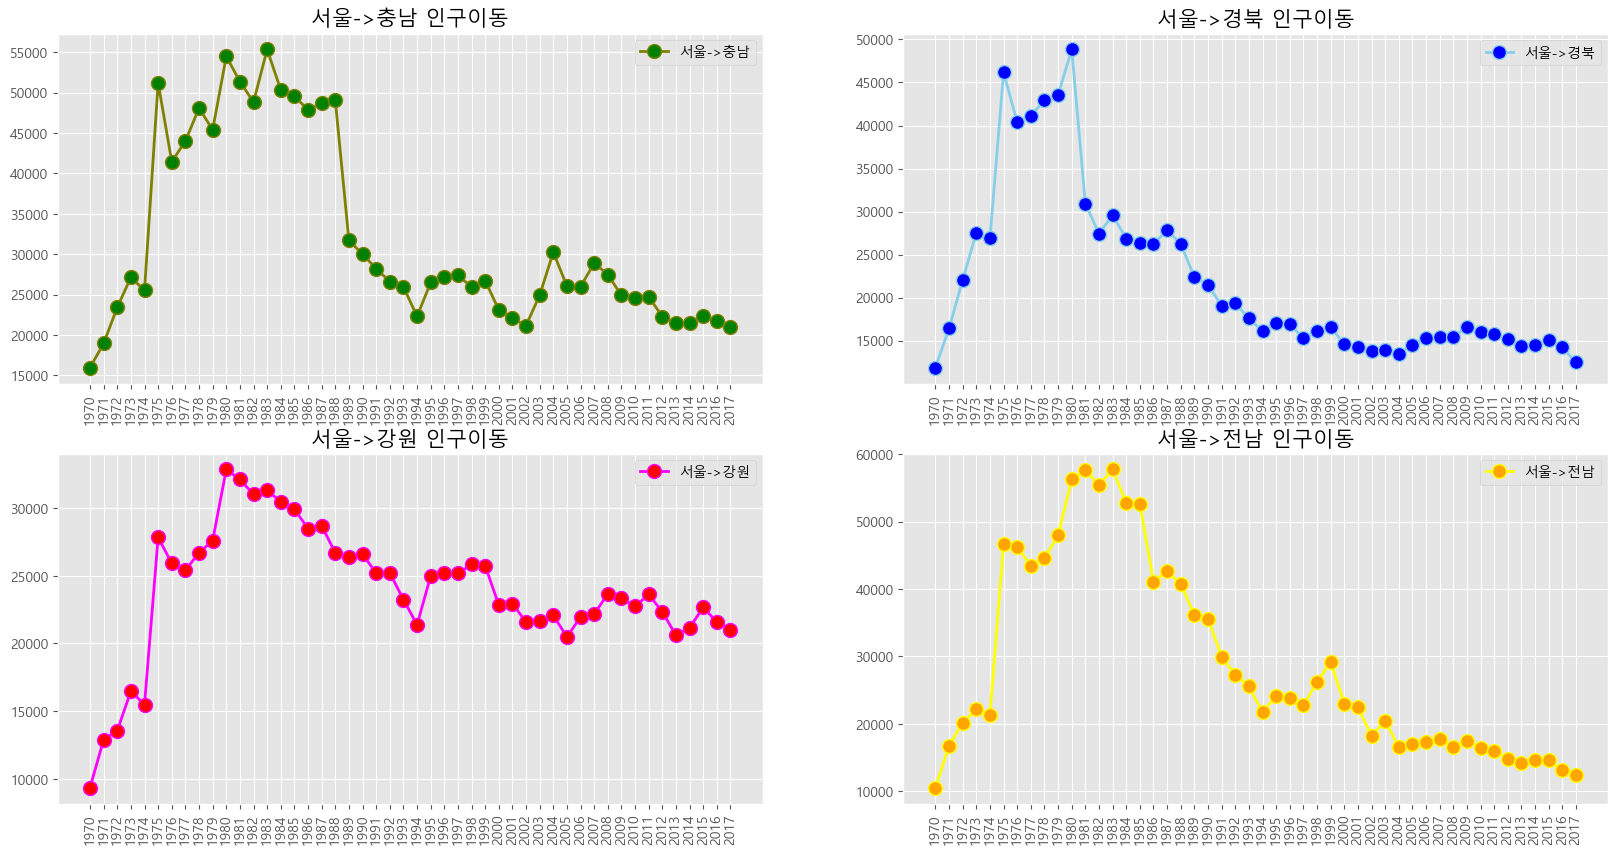

In [43]:
col_years = list(map(str,range(1970,2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_years]

plt.style.use('ggplot')

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


ax1.plot(col_years, df_4.loc['충청남도',:], marker='o', markerfacecolor='green', markersize=10, color='olive', linewidth=2, label='서울->충남')
ax2.plot(col_years, df_4.loc['경상북도',:], marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linewidth=2, label='서울->경북')
ax3.plot(col_years, df_4.loc['강원도',:], marker='o', markerfacecolor='red', markersize=10, color='magenta', linewidth=2, label='서울->강원')
ax4.plot(col_years, df_4.loc['전라남도',:], marker='o', markerfacecolor='orange', markersize=10, color='yellow', linewidth=2, label='서울->전남')

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

ax1.set_title('서울->충남 인구이동', size=15)
ax2.set_title('서울->경북 인구이동', size=15)
ax3.set_title('서울->강원 인구이동', size=15)
ax4.set_title('서울->전남 인구이동', size=15)

ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

plt.show()

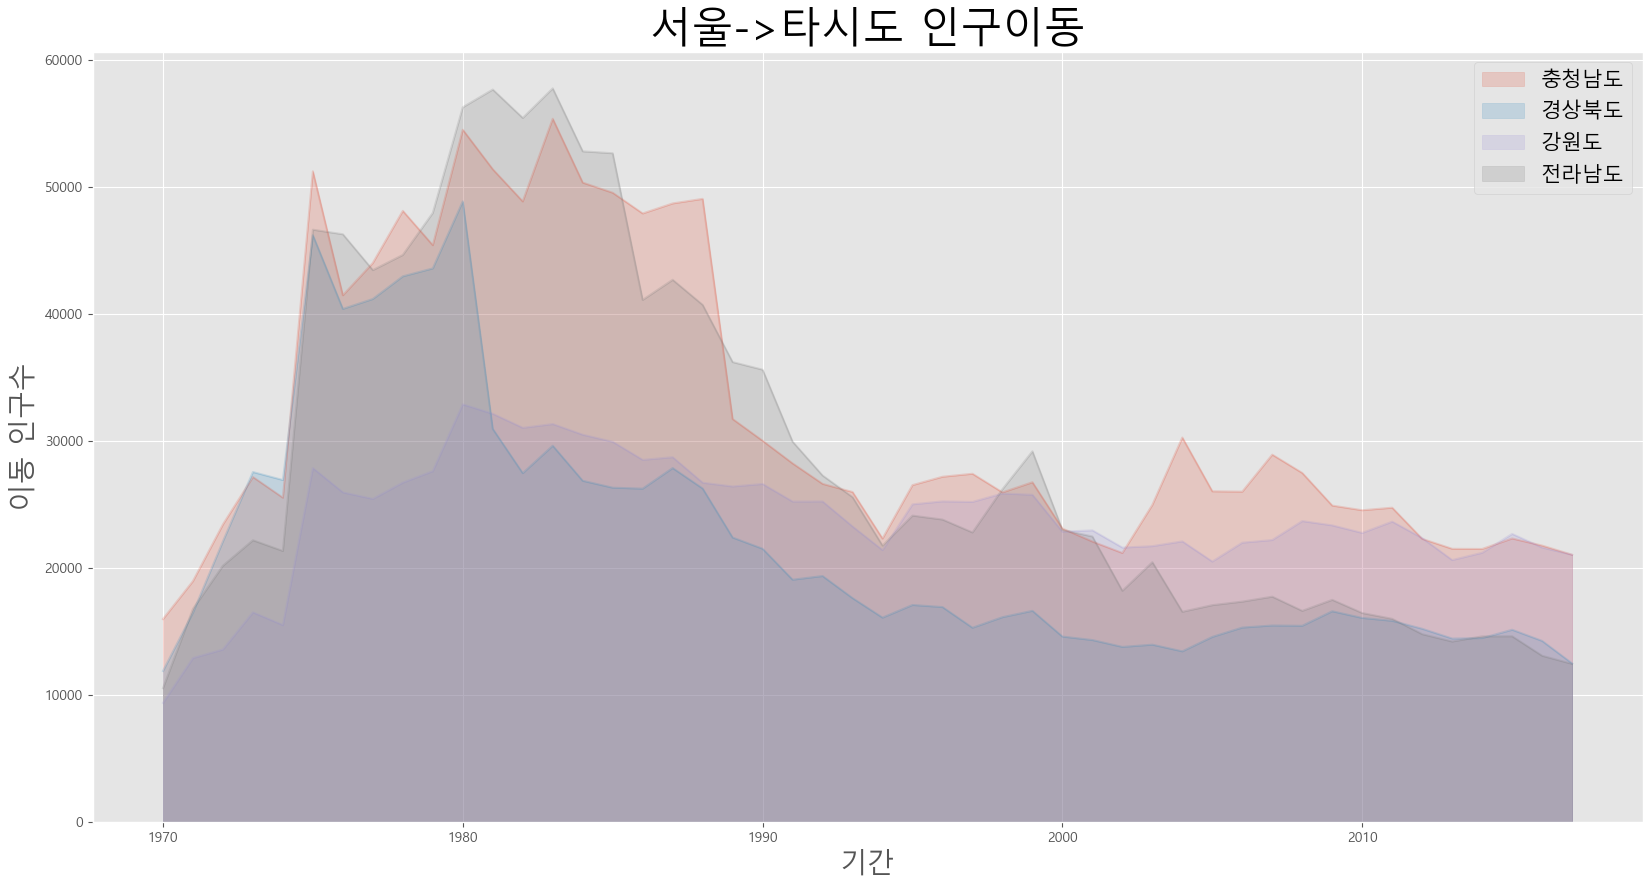

In [47]:
mask =(df['전출지별']== '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'],axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

col_years=list(map(str,range(1970,2018)))

df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df_4 = df_4.transpose()

plt.style.use('ggplot')

df_4.index = df_4.index.map(int)

df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20,10))

plt.title('서울->타시도 인구이동', size=30)
plt.ylabel('이동 인구수', size=20)
plt.xlabel('기간',size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

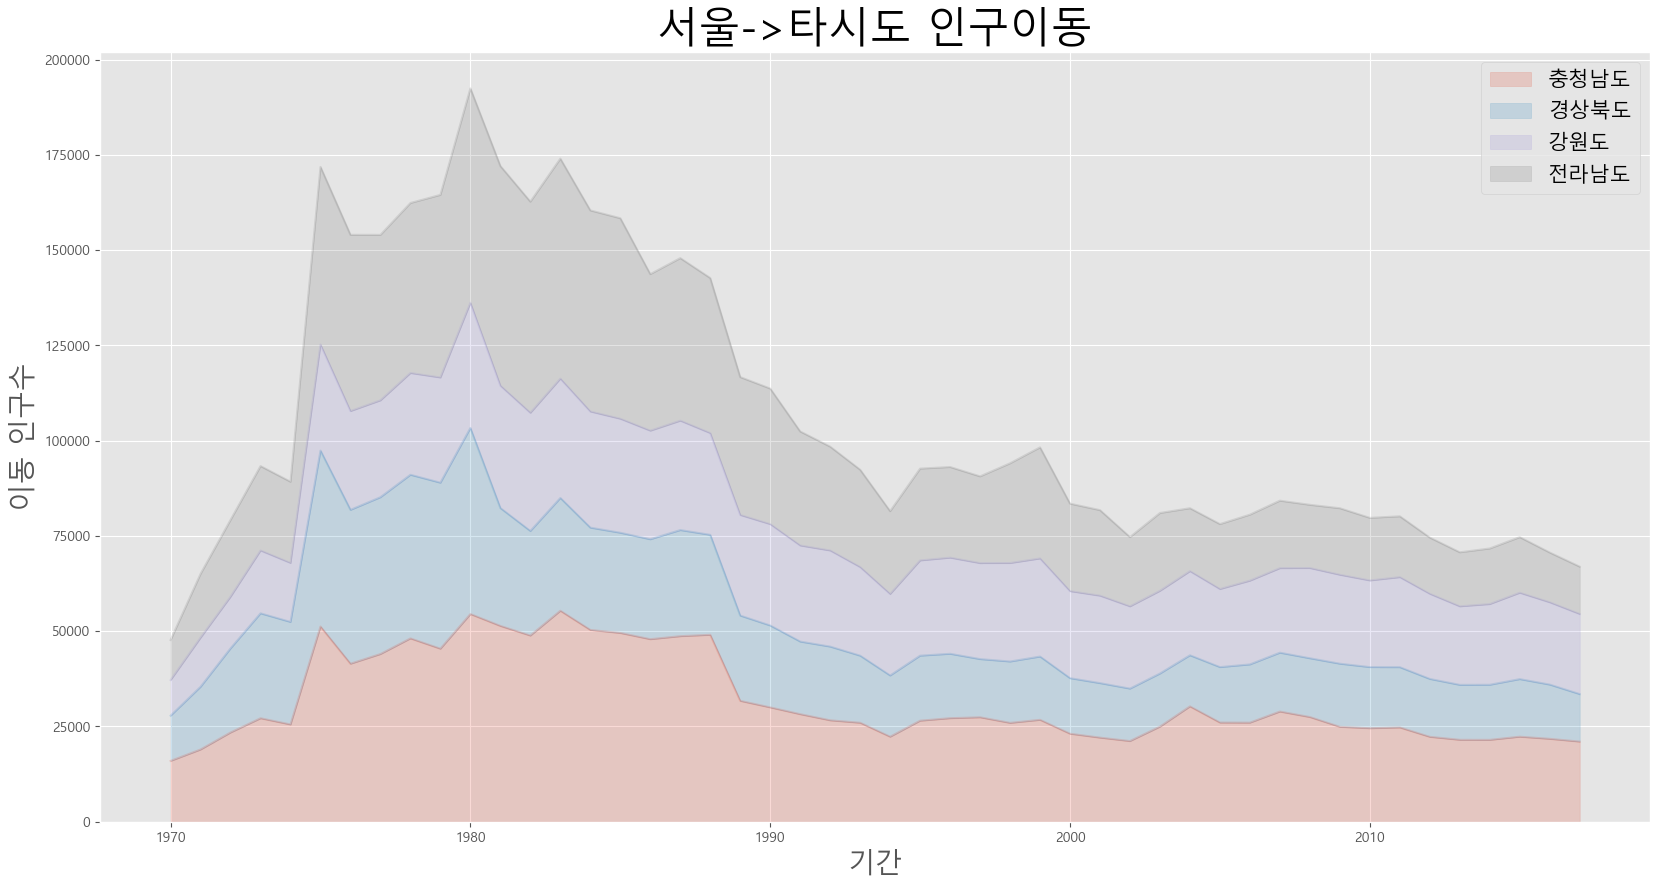

In [48]:
df_4.index = df_4.index.map(int)

df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20,10))

plt.title('서울->타시도 인구이동', size=30)
plt.ylabel('이동 인구수', size=20)
plt.xlabel('기간',size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

<class 'matplotlib.axes._axes.Axes'>


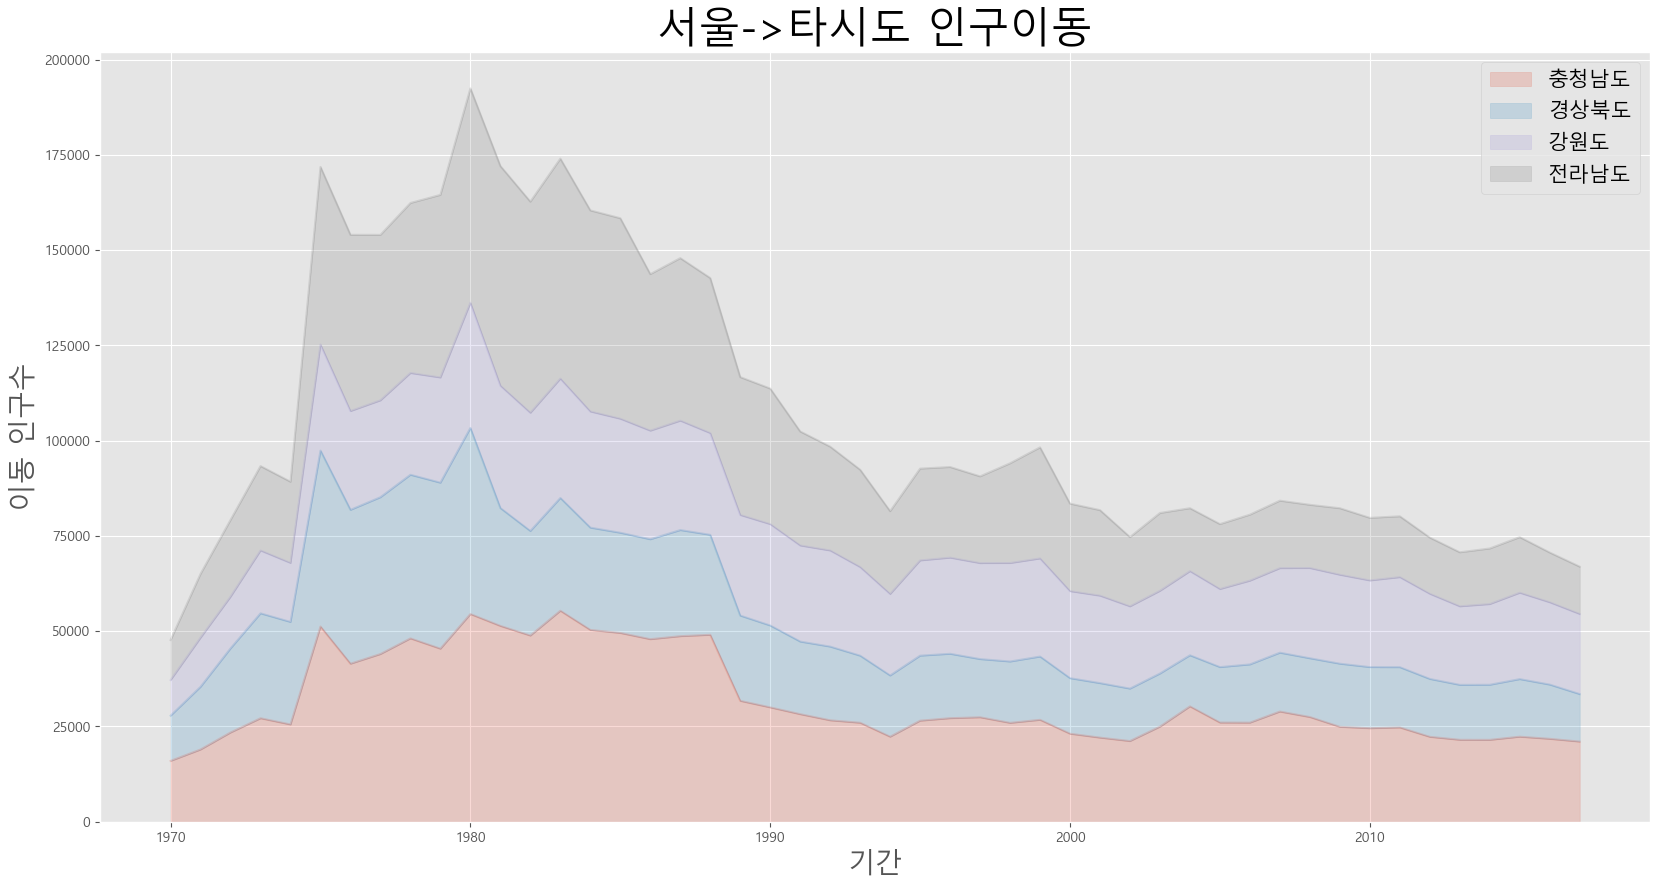

In [49]:
df_4.index = df_4.index.map(int)

df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20,10))
print(type(ax))


plt.title('서울->타시도 인구이동', size=30)
plt.ylabel('이동 인구수', size=20)
plt.xlabel('기간',size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

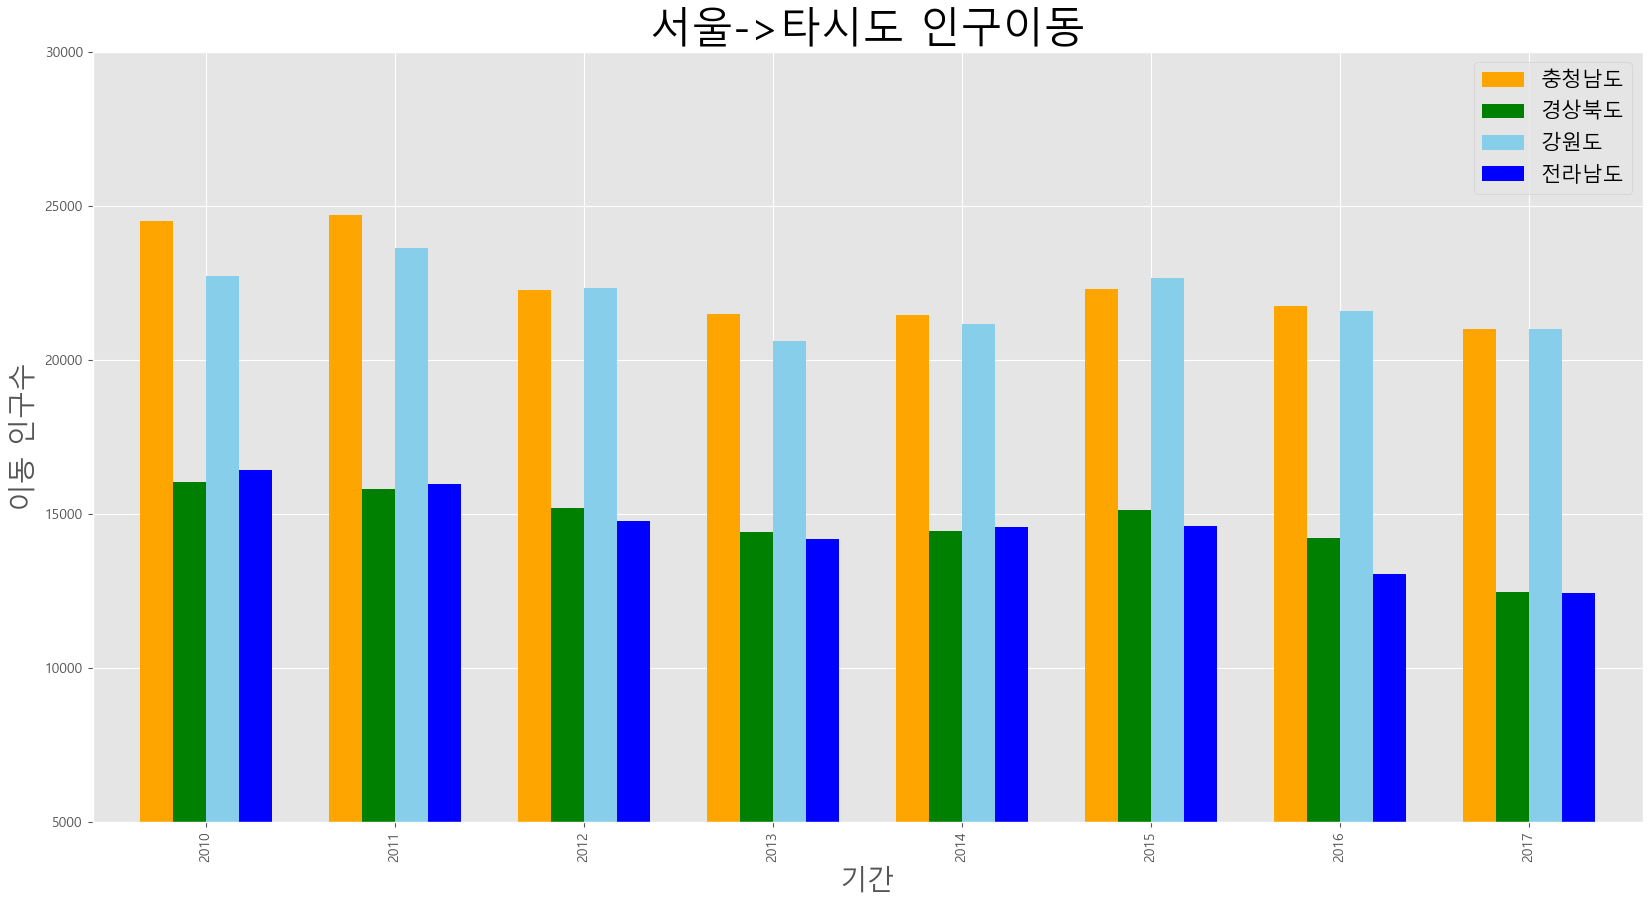

In [56]:
col_years=list(map(str,range(2010,2018)))

df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df_4 = df_4.transpose()

plt.style.use('ggplot')

df_4.index = df_4.index.map(int)

df_4.plot(kind='bar', figsize=(20,10), width=0.7, color=['orange','green','skyblue','blue'])

plt.title('서울->타시도 인구이동', size=30)
plt.ylabel('이동 인구수', size=20)
plt.xlabel('기간',size=20)
plt.ylim(5000,30000)
plt.legend(loc='best', fontsize=15)

plt.show()

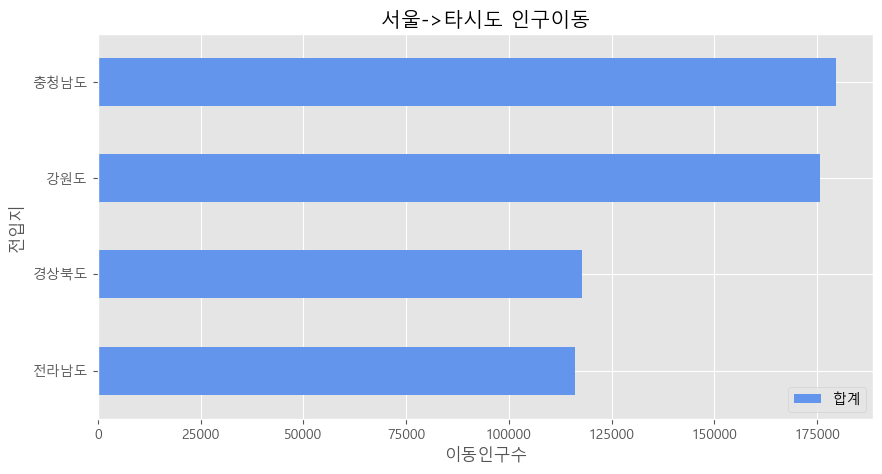

In [58]:
col_years=list(map(str,range(2010,2018)))

df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df_4['합계']=df_4.sum(axis=1)
df_total=df_4[['합계']].sort_values(by='합계',ascending=True
                                  )
plt.style.use('ggplot')

df_total.plot(kind='barh', figsize=(10,5), width=0.5, color='cornflowerblue')

plt.title('서울->타시도 인구이동')
plt.ylabel('전입지')
plt.xlabel('이동인구수')


plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-77-95f3e16ba81e>:14: FutureWarning: convert_float is deprecated and will be removed in a future version.
  df = pd.read_excel('/content/drive/MyDrive/남북한발전전력량.xlsx', convert_float=True)


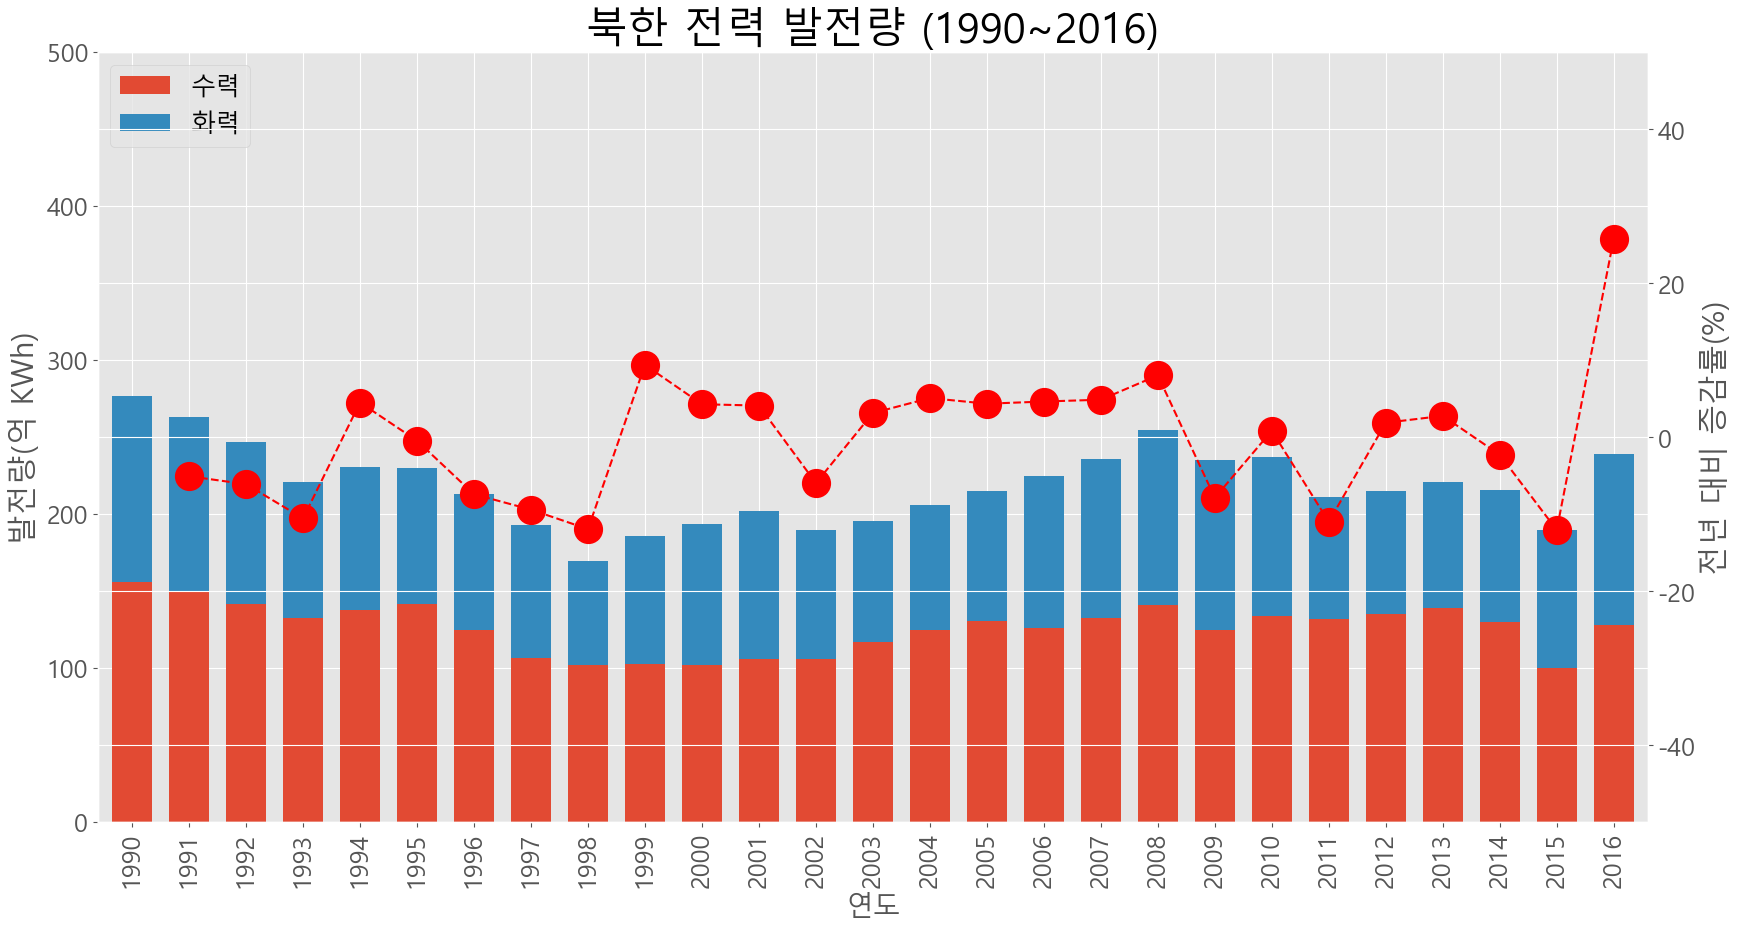

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
!apt-get -qq install fonts-nanum

fe = fm.FontEntry(
    fname=r'/content/drive/MyDrive/malgun.ttf', # ttf 파일이 저장되어 있는 경로
    name='malgunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'malgunGothic'})


from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/남북한발전전력량.xlsx', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns',inplace=True)
df.set_index('발전 전력별',inplace=True)
df=df.T

df = df.rename(columns={'합계':'총발전량'})
df['총발전량-1년'] = df['총발전량'].shift(1)
df['증감률'] = ((df['총발전량']/df['총발전량-1년'])-1)*100

ax1 = df[['수력','화력']].plot(kind='bar',figsize=(20,10),width=0.7,stacked=True)
ax2 = ax1.twinx()
ax2.plot(df.index,df.증감률,ls='--',marker='o',markersize=20,color='red',label='전년대비 증감률(%)')

ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도',size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감률(%)')

plt.title('북한 전력 발전량 (1990~2016)',size=30)
ax1.legend(loc='upper left')

plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


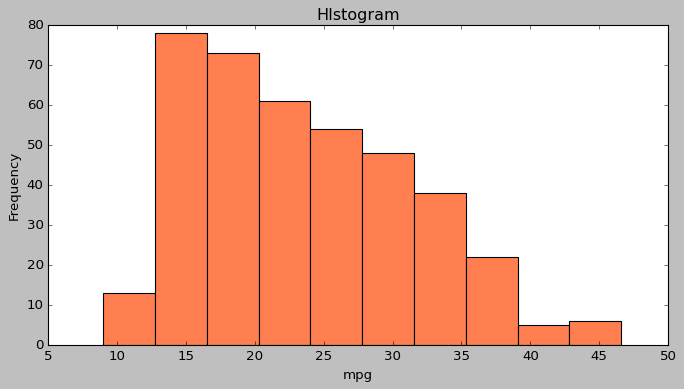

In [81]:

#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic')  #스타일 서식 저장

#read_csv() 함수로 df 생성
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/auto-mpg.csv', header=None)

#열 이름 저장
df.columns = ['mpg','cylinders','displacemment','horsepower','weight','acceleration','model year','origin','name']

#연비(mpg) 열에 대한 히스토그램 그리기
df['mpg'].plot(kind="hist",bins=10,color='coral',figsize=(10,5))

#그래프 꾸미기
plt.title('HIstogram')
plt.xlabel('mpg')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


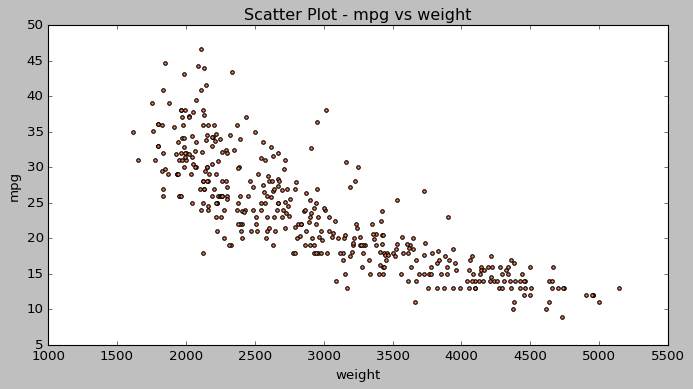

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic')  #스타일 서식 저장

#read_csv() 함수로 df 생성
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/auto-mpg.csv', header=None)

#열 이름 저장
df.columns = ['mpg','cylinders','displacemment','horsepower','weight','acceleration','model year','origin','name']

#연비(mpg)와 차중(weight) 열에 대한 산점도 그리기
df.plot(kind='scatter',x = 'weight', y = 'mpg', c='coral',s = 10, figsize=(10,5))
plt.title('Scatter Plot - mpg vs weight')
plt.show()
